In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("titanic dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
del df["Name"]

In [8]:
del df["Ticket"]
del df["Fare"]
del df["Cabin"]

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [10]:
#changing value of male to 1 and female to 2


def getNumber(str):
    if str == "male":
        return 1
    if str == "female":
        return 2


df["Gender"] = df.Sex.apply(getNumber)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [11]:
del df["Sex"]

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [13]:
mean_survived = df[df.Survived == 1].Age.mean()
mean_dead = df[df.Survived == 0].Age.mean()

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [15]:
df["age"] = np.where(pd.isnull(df.Age) & df["Survived"] == 1, mean_survived, df["Age"])
df.head()

#here you filled survived na with meana_survived when condition was true and
#df["Age"] when condition was false

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [16]:
df[(pd.isnull(df.Age)) & (df.Survived == 0)]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
5,6,0,3,NaN,0,0,Q,1,NaN
26,27,0,3,NaN,0,0,C,1,NaN
29,30,0,3,NaN,0,0,S,1,NaN
42,43,0,3,NaN,0,0,C,1,NaN
45,46,0,3,NaN,0,0,S,1,NaN
...,...,...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,0,C,1,NaN
863,864,0,3,NaN,8,2,S,2,NaN
868,869,0,3,NaN,0,0,S,1,NaN
878,879,0,3,NaN,0,0,S,1,NaN


In [17]:
df.age.fillna(mean_dead, inplace = True)

#basically df.age creates a series which is a copy of original column in data frame
#this is an intermediate object and any changes applied to this will not appear in the 
#original dataframe

C:\Users\vineet\AppData\Local\Temp\ipykernel_4884\4257825826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(mean_dead, inplace = True)


In [18]:
df.fillna({"age" : mean_dead}, inplace=True)

In [19]:
print(f"Dead : {mean_dead} \nAlive : {mean_survived}")

Dead : 30.62617924528302 
Alive : 28.343689655172415


In [20]:
df.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
886,887,0,2,27.0,0,0,S,1,27.000000
887,888,1,1,19.0,0,0,S,2,19.000000
888,889,0,3,NaN,1,2,S,2,30.626179
889,890,1,1,26.0,0,0,C,1,26.000000
890,891,0,3,32.0,0,0,Q,1,32.000000


In [21]:
del df["Age"]
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


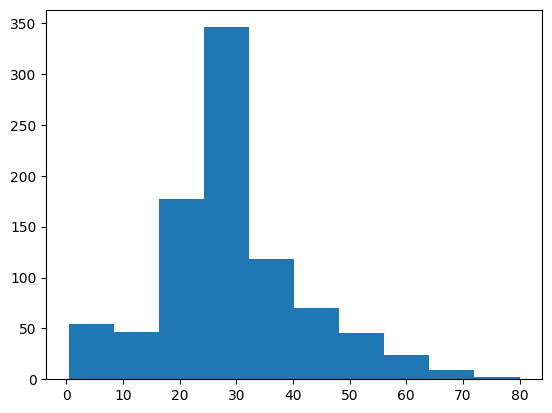

In [22]:
plt.hist(df.age)
plt.show()

In [23]:
l = df.Embarked.unique()
l

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df.Embarked.isnull().sum()

np.int64(2)

In [25]:
df["Embarked"] = df.Embarked.fillna(df["Embarked"].mode()[0])

In [26]:
for i in l:
    survived = df[(df.Embarked == i) & (df.Survived == 1)].shape[0]
    print(f"Survived_{i} : {survived}")

# survived_Q = df[(df.Embarked == "Q") & (df.Survived)]

Survived_S : 219
Survived_C : 93
Survived_Q : 30
Survived_nan : 0


In [27]:
for i in l:
    not_survived = df[(df.Embarked == i) & (df.Survived == 0)].shape[0]
    print(f"Not_survived_{i} : {not_survived}")


Not_survived_S : 427
Not_survived_C : 75
Not_survived_Q : 47
Not_survived_nan : 0


In [28]:
#Survival is changing based on where a passenger boarded

In [29]:
df.rename(columns = {"age" : "Age", "Gender" : "Sex"}, inplace = True)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [30]:
def getEmb(str):
    if str == "S":
        return 1
    elif str == "Q":
        return 2
    else:
        return 3
    
df["Embark"] = df["Embarked"].apply(getEmb)
df.head()
    

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [31]:
df.drop("Embarked", axis = 1, inplace=True)


In [32]:
df.rename(columns={"Embark" : "Embarked"})

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.000000,1
1,2,1,1,1,0,2,38.000000,3
2,3,1,3,0,0,2,26.000000,1
3,4,1,1,1,0,2,35.000000,1
4,5,0,3,0,0,1,35.000000,1
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,1,27.000000,1
887,888,1,1,0,0,2,19.000000,1
888,889,0,3,1,2,2,30.626179,1
889,890,1,1,0,0,1,26.000000,3


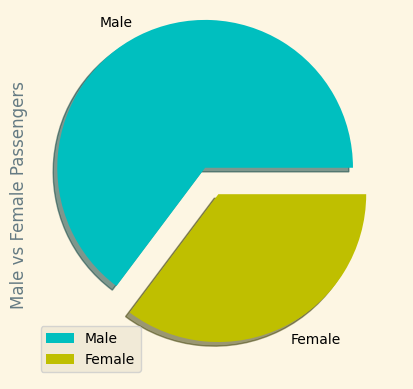

In [33]:
plt.style.use("Solarize_Light2")
df["Sex"].value_counts().plot(kind = "pie", labels = ["Male", "Female"], shadow = True, explode = [0.2, 0], colors = ["c","y"])
plt.ylabel("Male vs Female Passengers")
plt.legend()

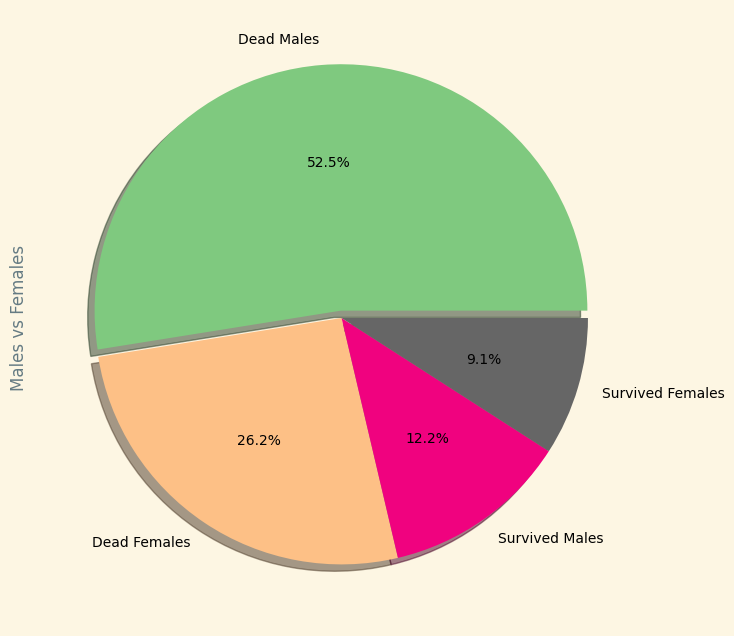

In [37]:
plt.figure(figsize = (8,8))
labels = ["Dead Males", "Dead Females", "Survived Males", "Survived Females"]
explosion = [0.03,0,0,0]
df[["Sex", "Survived"]].value_counts().plot.pie(labels = labels, cmap = "Accent", shadow = True, explode = explosion, autopct="%.1f%%")
# plt.legend()
plt.ylabel("Males vs Females")
plt.show()


In [35]:
df[["Sex", "Survived"]].value_counts()


Sex  Survived
1    0           468
2    1           233
1    1           109
2    0            81
Name: count, dtype: int64